# Tugas Besar Machine Learning (Tahap 1)
---
Nama : Reza Ahmad Yahya
<br>NIM : 1301184403
<br>Kelas : IF-42-12

## Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm

%matplotlib inline
%config IPCompleter.greedy=True

mpl.style.use(['ggplot']) 

## Load Dataset
>Karena studi kasusnya adalah clustering, maka data train dan data testnya digabung menjadi satu dataset dan targetnya di drop

In [3]:
df_train = pd.read_csv('salju_train.csv')
df_test = pd.read_csv('salju_test.csv')

In [4]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.drop(columns=['BersaljuHariIni', 'BersaljuBesok'], inplace=True)
df.reset_index(inplace=True)
df.drop('id', axis=1, inplace=True)
df.rename(columns={'index':'id'}, inplace=True)
df

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
0,0,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,...,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0
1,1,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,...,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5
2,2,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,...,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6
3,3,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,...,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2
4,4,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,...,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127272,127272,14/11/2012,C40,7.8,25.8,0.0,8.0,13.2,NE,31.0,...,22.0,13.0,59.0,21.0,1017.1,1014.2,6.0,1.0,16.8,24.0
127273,127273,24/10/2015,C40,12.4,26.6,0.0,8.0,11.6,NW,37.0,...,17.0,20.0,59.0,25.0,1022.2,1018.7,1.0,1.0,17.1,25.7
127274,127274,31/08/2010,C21,6.7,22.9,0.0,NaN,NaN,NaN,NaN,...,0.0,4.0,84.0,35.0,NaN,NaN,1.0,2.0,11.8,22.0
127275,127275,24/08/2013,C12,12.5,26.7,0.0,9.0,10.8,NE,35.0,...,2.0,26.0,56.0,45.0,1021.9,1018.1,5.0,5.0,22.9,25.4


## Data Exploration and Understanding 
1. Melihat dimensi data
2. Melihat propertis statistik data
3. Melihat apakah terdapat missing value atau tidak
4. Bivariate Analysis
    * Melihat datatype masing-masing feature (Categorical atau Numerical)
    * Menghitung jumlah missing value di masing-masing datatype
    * Mencari outliers di numerik variabel
5. Multivariate Analysis
    * Korelasi antar variabel

### Dimensi data

In [5]:
df.shape

(127277, 22)

### Identifikasi data 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127277 entries, 0 to 127276
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        127277 non-null  int64  
 1   Tanggal                   127277 non-null  object 
 2   KodeLokasi                127277 non-null  object 
 3   SuhuMin                   125990 non-null  float64
 4   SuhuMax                   126183 non-null  float64
 5   Hujan                     124459 non-null  float64
 6   Penguapan                 72397 non-null   float64
 7   SinarMatahari             66180 non-null   float64
 8   ArahAnginTerkencang       118252 non-null  object 
 9   KecepatanAnginTerkencang  118307 non-null  float64
 10  ArahAngin9am              118046 non-null  object 
 11  ArahAngin3pm              123584 non-null  object 
 12  KecepatanAngin9am         125726 non-null  float64
 13  KecepatanAngin3pm         124620 non-null  f

In [7]:
df.describe()

,id,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
count,127277.000000,125990.000000,126183.000000,124459.000000,72397.000000,66180.000000,118307.000000,125726.000000,124620.000000,124945.000000,123355.000000,114085.000000,114116.000000,78391.000000,75350.000000,125718.000000,124137.000000
mean,63638.000000,12.201471,23.226354,2.377650,5.469173,7.603905,40.023726,14.040636,18.664412,68.880732,51.549212,1017.634863,1015.242807,4.450741,4.513603,16.999614,21.687295
std,36741.849443,6.395664,7.113840,8.550372,4.195609,3.790075,13.599594,8.912196,8.818594,19.018872,20.792633,7.121660,7.051440,2.885420,2.719652,6.484337,6.930820
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,31819.000000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,63638.000000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,95457.000000,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,127276.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


### Mencari Missing Values 

In [8]:
df.isna().any()

id                          False
Tanggal                     False
KodeLokasi                  False
SuhuMin                      True
SuhuMax                      True
Hujan                        True
Penguapan                    True
SinarMatahari                True
ArahAnginTerkencang          True
KecepatanAnginTerkencang     True
ArahAngin9am                 True
ArahAngin3pm                 True
KecepatanAngin9am            True
KecepatanAngin3pm            True
Kelembaban9am                True
Kelembaban3pm                True
Tekanan9am                   True
Tekanan3pm                   True
Awan9am                      True
Awan3pm                      True
Suhu9am                      True
Suhu3pm                      True
dtype: bool

Terdapat missing value pada semua atribut kecuali 'id', 'Tanggal', dan 'KodeLokasi'.

### Bivariate Analysis

1. Datetime 
2. Numerical
3. Categorical

### Datetime

In [9]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

### Numerik

In [10]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.head()

,id,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
0,0,10.4,15.5,4.8,NaN,NaN,24.0,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0
1,1,9.0,17.0,8.0,2.6,7.4,NaN,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5
2,2,18.2,32.0,0.0,NaN,NaN,44.0,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6
3,3,7.3,24.5,0.0,8.4,10.4,54.0,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2
4,4,5.9,20.3,0.0,3.6,12.6,37.0,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1


In [11]:
print('Terdapat {x} numerik variabel.'.format(x=len(numeric_features.columns)))

Terdapat 17 numerik variabel.


In [12]:
numeric_features.isna().sum()

id                              0
SuhuMin                      1287
SuhuMax                      1094
Hujan                        2818
Penguapan                   54880
SinarMatahari               61097
KecepatanAnginTerkencang     8970
KecepatanAngin9am            1551
KecepatanAngin3pm            2657
Kelembaban9am                2332
Kelembaban3pm                3922
Tekanan9am                  13192
Tekanan3pm                  13161
Awan9am                     48886
Awan3pm                     51927
Suhu9am                      1559
Suhu3pm                      3140
dtype: int64

16 numerik variabel mengandung missing values.

#### Mencari Outliers

In [13]:
print(round(numeric_features.describe()),2)

             id   SuhuMin   SuhuMax     Hujan  Penguapan  SinarMatahari  \
count  127277.0  125990.0  126183.0  124459.0    72397.0        66180.0   
mean    63638.0      12.0      23.0       2.0        5.0            8.0   
std     36742.0       6.0       7.0       9.0        4.0            4.0   
min         0.0      -8.0      -5.0       0.0        0.0            0.0   
25%     31819.0       8.0      18.0       0.0        3.0            5.0   
50%     63638.0      12.0      23.0       0.0        5.0            8.0   
75%     95457.0      17.0      28.0       1.0        7.0           11.0   
max    127276.0      34.0      48.0     371.0      145.0           14.0   

       KecepatanAnginTerkencang  KecepatanAngin9am  KecepatanAngin3pm  \
count                  118307.0           125726.0           124620.0   
mean                       40.0               14.0               19.0   
std                        14.0                9.0                9.0   
min                         6.0 

Bisa dilihat atribut **Hujan**, **Penguapan**, **KecepatanAngin3pm**, dan **KecepatanAngin9am** ada kemungkinan memiliki outliers karena nilai maxnya dengan mean terlalu jauh jaraknya.

Text(0, 0.5, 'KecepatanAngin9am')

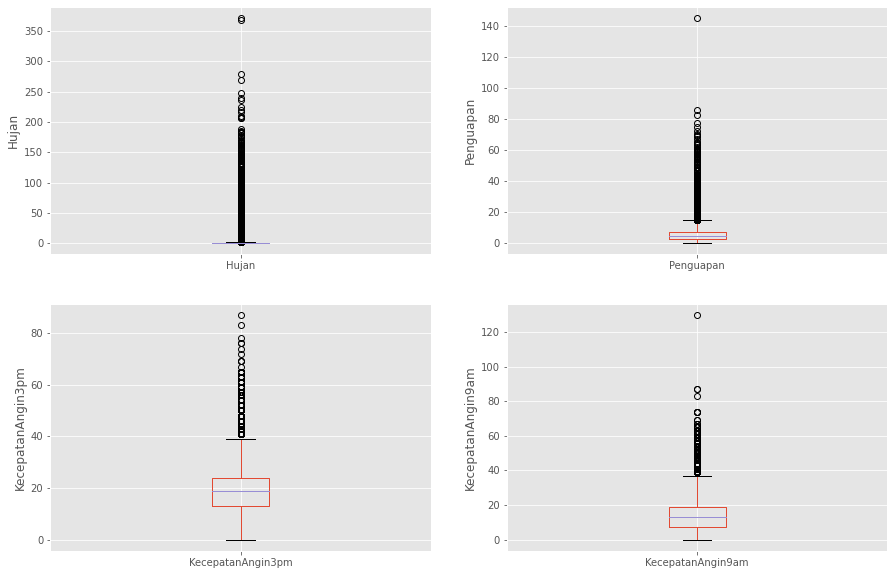

In [14]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Hujan')
fig.set_title('')
fig.set_ylabel('Hujan')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Penguapan')
fig.set_title('')
fig.set_ylabel('Penguapan')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='KecepatanAngin3pm')
fig.set_title('')
fig.set_ylabel('KecepatanAngin3pm')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='KecepatanAngin9am')
fig.set_title('')
fig.set_ylabel('KecepatanAngin9am')

Dari boxplot terlihat bahwa keempat atribut tersebut memiliki outliers. Outliers in akan di process di Data Preprocessing 

In [15]:
num_outliers = ['Hujan', 'Penguapan', 'KecepatanAngin9am', 'KecepatanAngin3pm']
for feature in num_outliers:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    Lower_fence = df[feature].quantile(0.25) - (IQR * 3)
    Upper_fence = df[feature].quantile(0.75) + (IQR * 3)
    print('Nilai outliers {column} adalah < {lowerboundary} or > {upperboundary}'.format(column=feature, lowerboundary=Lower_fence, upperboundary=Upper_fence))

Nilai outliers Hujan adalah < -2.4000000000000004 or > 3.2
Nilai outliers Penguapan adalah < -11.800000000000002 or > 21.800000000000004
Nilai outliers KecepatanAngin9am adalah < -29.0 or > 55.0
Nilai outliers KecepatanAngin3pm adalah < -20.0 or > 57.0


Nilai diatas adalah nilai Upper dan Lower **Outer** Fence dari atribut yang memiliki outliers.

### Categorical

In [16]:
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.head()

,KodeLokasi,ArahAnginTerkencang,ArahAngin9am,ArahAngin3pm
0,C4,WSW,NaN,WSW
1,C10,NaN,SW,WNW
2,C46,ESE,SE,SE
3,C36,SSW,N,SW
4,C7,N,NNW,ESE


In [17]:
print('Terdapat {x} categorical variabel.'.format(x=len(categorical_features.columns)))

Terdapat 4 categorical variabel.


In [18]:
categorical_features.isna().sum()

KodeLokasi                0
ArahAnginTerkencang    9025
ArahAngin9am           9231
ArahAngin3pm           3693
dtype: int64

3 categorical variabel mengandung missing values.

### Multivariate Analysis

#### Mencari korelasi antar variabel

Text(0.5, 1.0, 'Korelasi Antar Variabel')

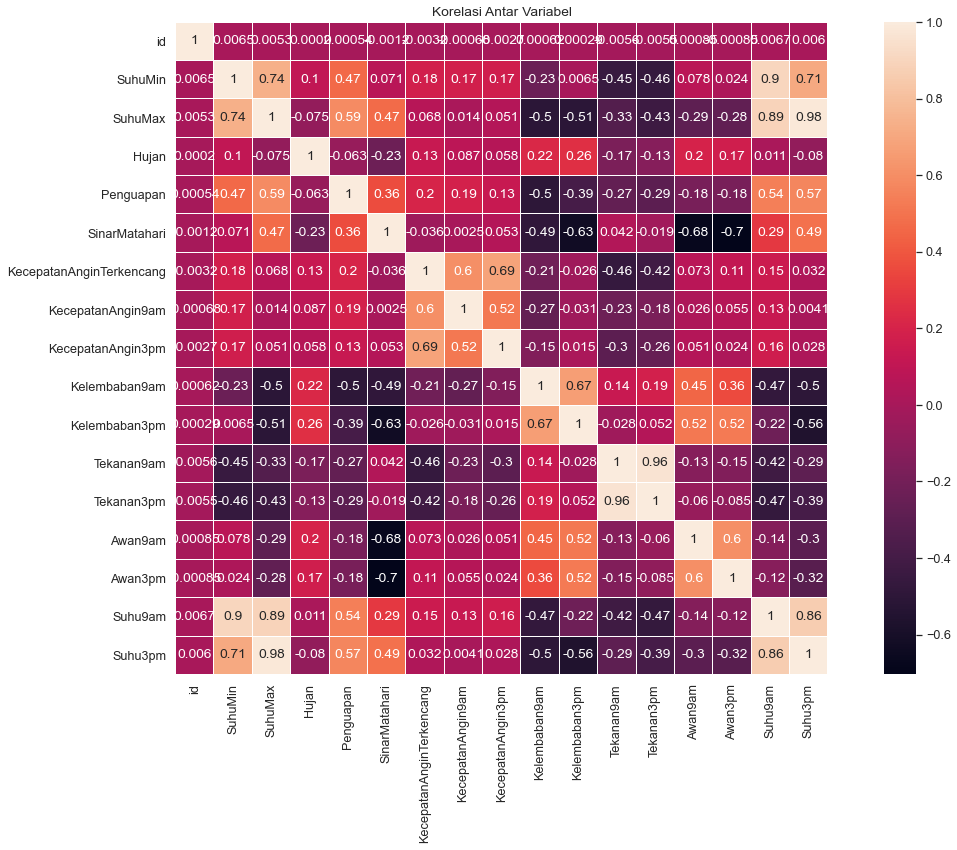

In [19]:
corr = df.corr()
sns.set(font_scale=1.15)
plt.figure(figsize=(20, 12))

sns.heatmap(corr, linewidths=0.01, square=True, annot=True)
plt.title('Korelasi Antar Variabel')

Dari heat map korelasi di atas, kita dapat menyimpulkan bahwa: 

* Variabel SuhuMin dan SuhuMax berkorelasi sangat positif (koefisien korelasi = 0,74).
* Variabel SuhuMin dan Suhu3pm juga berkorelasi positif tinggi (koefisien korelasi = 0,71).
* Variabel SuhuMin dan Suhu9am berkorelasi positif kuat (koefisien korelasi = 0,90).
* Variabel SuhuMax dan Suhu9am berkorelasi positif kuat (koefisien korelasi = 0.89).
* Variabel SuhuMax dan Suhu3pm juga berkorelasi positif kuat (koefisien korelasi = 0,98).
* Variabel KecepatanAnginTerkencang dan KecepatanAngin3pm berkorelasi sangat positif (koefisien korelasi = 0,69).
* Variabel Tekanan9am dan Tekanan3pm berkorelasi positif kuat (koefisien korelasi = 0,96).
* Variabel Suhu9am dan Suhu3pm berkorelasi positif kuat (koefisien korelasi = 0.86).

## Data Preprocessing
* Mengatasi Missing Values
* Mengatasi Outliers
* Data Normalizations
* Mengubah categorical ke numerical

### Mengatasi Missing Values 
>Mengganti missing values dengan nilai **mean** dari masing-masing features untuk **numerical**. Untuk **categorical** features diubah dengan nilai **modus**.

In [20]:
for feature in numeric_features:
    if feature != 'id':
        mean = int(df[feature].mean(skipna=True))
        df[feature].fillna(mean, inplace=True)

In [21]:
for feature in categorical_features:
    if feature != 'KodeLokasi':
        modus = df[feature].mode()
        df[feature].fillna(modus[0], inplace=True)

In [22]:
df.isna().any()

id                          False
Tanggal                     False
KodeLokasi                  False
SuhuMin                     False
SuhuMax                     False
Hujan                       False
Penguapan                   False
SinarMatahari               False
ArahAnginTerkencang         False
KecepatanAnginTerkencang    False
ArahAngin9am                False
ArahAngin3pm                False
KecepatanAngin9am           False
KecepatanAngin3pm           False
Kelembaban9am               False
Kelembaban3pm               False
Tekanan9am                  False
Tekanan3pm                  False
Awan9am                     False
Awan3pm                     False
Suhu9am                     False
Suhu3pm                     False
dtype: bool

### Mengatasi Outliers
> Menggunakan pendekatan Top-Coding yang berarti mengganti nilai outliers dengan nilai ***Upper Outer Fence***

In [23]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

In [24]:
df['Hujan'] = max_value(df, 'Hujan', 3.2)
df['Penguapan'] = max_value(df, 'Penguapan', 21.8)
df['KecepatanAngin9am'] = max_value(df, 'KecepatanAngin9am', 55)
df['KecepatanAngin3pm'] = max_value(df, 'KecepatanAngin3pm', 57)

In [25]:
df.describe()

,id,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
count,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000
mean,63638.000000,12.199434,23.224408,0.715426,5.229106,7.314011,40.022054,14.035490,18.646951,68.864595,51.532288,1017.569060,1015.217700,4.277615,4.304061,16.987370,21.670339
std,36741.849443,6.363278,7.083231,1.193709,2.794710,2.749572,13.111613,8.830652,8.708365,18.844201,20.469985,6.745267,6.677326,2.275055,2.107734,6.445439,6.845622
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,31819.000000,7.700000,18.000000,0.000000,4.000000,7.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.400000,16.700000
50%,63638.000000,12.000000,22.700000,0.000000,5.000000,7.000000,39.000000,13.000000,18.000000,69.000000,51.000000,1017.000000,1015.000000,4.000000,4.000000,16.600000,21.000000
75%,95457.000000,16.800000,28.200000,1.000000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,127276.000000,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [26]:
df[0:1]

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
0,0,2014-01-06,C4,10.4,15.5,3.2,5.0,7.0,WSW,24.0,...,0.0,13.0,78.0,76.0,1020.1,1018.5,4.0,4.0,13.1,15.0


# Mengubah categorical ke numerical
>menggunakan get_dummies() untuk mengubah categorical ke numerical yang membuat unique valuenya akan menjadi atribut

_note : Preprocessing ini tidak terlalu berpengaruh ke proses clusteringnya, karena hanya mengubah atribut bertipe kategorikal ke numerik yang mana tidak terpakai juga._

### Data Normalizations
>Normalisasi ini menggunakan MinMaxScaler().

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [28]:
df_scaler = df.select_dtypes(include=[np.number]).copy()
df_scaler.drop('id',axis=1, inplace=True)
df_scaler.head()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
0,10.4,15.5,3.2,5.0,7.0,24.0,0.0,13.0,78.0,76.0,1020.1,1018.5,4.0,4.0,13.1,15.0
1,9.0,17.0,3.2,2.6,7.4,40.0,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5
2,18.2,32.0,0.0,5.0,7.0,44.0,15.0,26.0,62.0,42.0,1017.0,1015.0,4.0,4.0,23.8,29.6
3,7.3,24.5,0.0,8.4,10.4,54.0,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2
4,5.9,20.3,0.0,3.6,12.6,37.0,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1


In [29]:
column = df_scaler.columns
column

Index(['SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari',
       'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm',
       'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am',
       'Awan3pm', 'Suhu9am', 'Suhu3pm'],
      dtype='object')

In [30]:
df_scaler = scaler.fit_transform(df_scaler)

In [31]:
df_scaler = pd.DataFrame(df_scaler, columns = column)
df_scaler.describe()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
count,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000,127277.000000
mean,0.488194,0.529762,0.223571,0.239867,0.504415,0.263737,0.255191,0.327139,0.688646,0.515323,0.612712,0.609883,0.475291,0.478229,0.510282,0.519584
std,0.150077,0.133899,0.373034,0.128198,0.189626,0.101640,0.160557,0.152778,0.188442,0.204700,0.111492,0.106837,0.252784,0.234193,0.135980,0.131394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.382075,0.431002,0.000000,0.183486,0.482759,0.193798,0.127273,0.228070,0.570000,0.370000,0.545455,0.542400,0.333333,0.444444,0.413502,0.424184
50%,0.483491,0.519849,0.000000,0.229358,0.482759,0.255814,0.236364,0.315789,0.690000,0.510000,0.603306,0.606400,0.444444,0.444444,0.502110,0.506718
75%,0.596698,0.623819,0.312500,0.247706,0.600000,0.310078,0.345455,0.421053,0.830000,0.650000,0.682645,0.676800,0.666667,0.666667,0.605485,0.606526
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Data telah ternormalisasi.

In [32]:
df_scaler.reset_index(inplace=True)
df_scaler.rename(columns={'index':'id'}, inplace=True)
df_scaler.head()

,id,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
0,0,0.445755,0.383743,1.0,0.229358,0.482759,0.139535,0.000000,0.228070,0.78,0.76,0.654545,0.6624,0.444444,0.444444,0.428270,0.391555
1,1,0.412736,0.412098,1.0,0.119266,0.510345,0.263566,0.236364,0.350877,0.80,0.61,0.573554,0.6000,0.777778,0.555556,0.402954,0.401152
2,2,0.629717,0.695652,0.0,0.229358,0.482759,0.294574,0.272727,0.456140,0.62,0.42,0.603306,0.6064,0.444444,0.444444,0.654008,0.671785
3,3,0.372642,0.553875,0.0,0.385321,0.717241,0.372093,0.236364,0.333333,0.25,0.17,0.639669,0.6368,0.111111,0.777778,0.474684,0.548944
4,4,0.339623,0.474480,0.0,0.165138,0.868966,0.240310,0.400000,0.333333,0.55,0.48,0.647934,0.6016,0.222222,0.666667,0.413502,0.451056


Data telah siap untuk diproses clustering

## Clustering

### Perhitungan Jarak
>Menggunakan ***Euclidean Distance***

In [33]:
from math import *

def euclidean(centroid, data):
    return sqrt(sum(pow(a-b,2) for a,b in zip(centroid, data)))

### K-Means Algorithm
>Algoritma:
>1. menentukan K
>2. pilih K centroid secara acak dari objek data
>3. menghitung jarak data ke objek data
>4. menentukan cluster berdasarkan jarak terdekat
>5. hitung rata-rata titik di setiap cluster untuk mendapat centroid baru
>6. ulangi langkah 3-5

In [55]:
def kmeans(data, k_clusters):
    # Menentukan posisi Centroid secara ajak dari data objek yang ada
    rng = np.random.RandomState(2)
    i = rng.permutation(data.shape[0])[:k_clusters]
    centroid = data.iloc[i, 1:].to_numpy()
    result = pd.DataFrame(data['id'])
    arr_data = data.iloc[:, 1:].to_numpy()
    
    while True:
        cluster = []
        dict_id = {
        'Cluster {x}'.format(x=i+1) : [] for i in range(len(centroid))
        }
        dict_jarak = {
        'Centroid {x}'.format(x=i+1) : [] for i in range(len(centroid))
        }
        
        # Menghitung Jarak
        progress = tqdm(range(len(arr_data)), leave=False)
        for index in progress:
            for i in range(len(centroid)):
                dict_jarak['Centroid {x}'.format(x=i+1)].append(euclidean(centroid[i] , arr_data[index]))
        
            # Menentukan Cluster
            klaster = min(dict_jarak['Centroid {x}'.format(x=i+1)][index] for i in range(len(centroid)))
            for i in range(len(centroid)): 
                if klaster == dict_jarak['Centroid {x}'.format(x=i+1)][index]:
                    cluster.append('Cluster {x}'.format(x=i+1))
                    dict_id['Cluster {x}'.format(x=i+1)].append(index)
                    break
                    
        
        result['Cluster'] = cluster
        
        # Menghitung Centroid baru dari rata-ratanya
        new_centroid = []
        for i in range(len(centroid)):
            temp_centroid = []
            for column in data.iloc[:, 1:].columns:
                temp_centroid.append(data.loc[dict_id['Cluster {x}'.format(x=i+1)], column].mean())
            new_centroid.append(temp_centroid)
        new_centroid = np.array(new_centroid)
        
        # Stop kondisi
        if np.all(centroid == new_centroid):
            break
            
        centroid = new_centroid

    return result, centroid, dict_jarak

### Pengujian Algoritma K-Means
> Disini saya hanya menguji K = 2 dan K = 3 dan atribut yang digunakan adalah 'Suhu9am' dan 'Suhu3pm' dikarenakan proses runningnya yang memakan waktu lama.

#### K = 3

In [56]:
result, centroid, dict_jarak = kmeans(df_scaler.loc[:, ['id', 'Suhu9am', 'Suhu3pm']], 3)

In [43]:
result.head()

,id,Cluster
0,0,Cluster 2
1,1,Cluster 2
2,2,Cluster 3
3,3,Cluster 1
4,4,Cluster 2


#### K = 2

In [57]:
result2, centroid2, dict_jarak2 = kmeans(df_scaler.loc[:, ['id', 'Suhu9am', 'Suhu3pm']], 2)

In [45]:
result2.head()

,id,Cluster
0,0,Cluster 2
1,1,Cluster 2
2,2,Cluster 1
3,3,Cluster 2
4,4,Cluster 2


### Evaluasi Clustering
>Menghitung SSEnya

#### K = 3

In [46]:
for keys in dict_jarak.keys():
    result[keys] = dict_jarak[keys]
    
jumlah = 0
for j in range(len(result['Cluster'].unique())):
    jumlah += sum(pow(i, 2) for i in result[result['Cluster'] == 'Cluster {x}'.format(x=j+1)]['Centroid {x}'.format(x=j+1)])
print('Sum of Squared Error (K = 3) : {x}'.format(x=jumlah))

Sum of Squared Error (K = 3) : 1070.048456548463


#### K = 2

In [47]:
for keys in dict_jarak2.keys():
    result2[keys] = dict_jarak2[keys]

jumlah2 = 0
for j in range(len(result2['Cluster'].unique())):
    jumlah2 += sum(pow(i, 2) for i in result2[result2['Cluster'] == 'Cluster {x}'.format(x=j+1)]['Centroid {x}'.format(x=j+1)])
print('Sum of Squared Error (K = 2) : {x}'.format(x=jumlah2))

Sum of Squared Error (K = 2) : 1757.0717003989237


### Visualisasi 

#### K = 3

In [48]:
cen_x = [i[0] for i in centroid] 
cen_y = [i[1] for i in centroid]

In [49]:
colors = ['#fc6c85', '#0099FF', '#15d9c0']
result['c'] = result.Cluster.map({'Cluster 1':colors[0], 'Cluster 2':colors[1], 'Cluster 3':colors[2]})

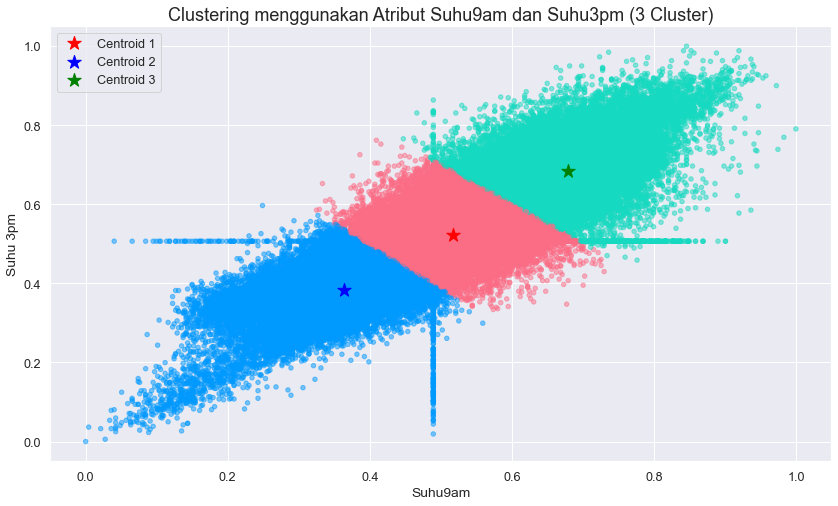

In [50]:
 # Data
ax0 = df_scaler.plot(kind='scatter', x='Suhu9am', y='Suhu3pm', figsize=(14, 8), alpha=0.5, color=result.c)

# Centroid
ax1 = plt.scatter(cen_x[0], cen_y[0], c='red', s=200, label='Centroid 1', marker='*')
ax2 = plt.scatter(cen_x[1], cen_y[1], c='blue', s=200, label='Centroid 2', marker='*')
ax2 = plt.scatter(cen_x[2], cen_y[2], c='green', s=200, label='Centroid 3', marker='*')

ax0.set_ylabel('Suhu 9am')
ax0.set_ylabel('Suhu 3pm')
ax0.set_title('Clustering menggunakan Atribut Suhu9am dan Suhu3pm (3 Cluster)', fontsize=18)
ax0.legend(loc='upper left')

#### K = 2

In [51]:
cent_x = [i[0] for i in centroid2] 
cent_y = [i[1] for i in centroid2]

In [52]:
result2['c'] = result2.Cluster.map({'Cluster 1':colors[0], 'Cluster 2':colors[1]})

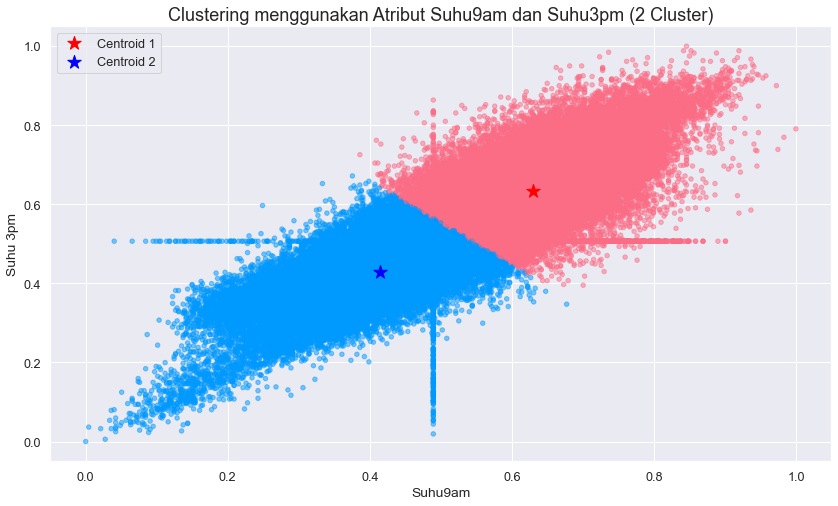

In [53]:
 # Data
ax0 = df_scaler.plot(kind='scatter', x='Suhu9am', y='Suhu3pm', figsize=(14, 8), alpha=0.5, color=result2.c)

# Centroid
ax1 = plt.scatter(cent_x[0], cent_y[0], c='red', s=200, label='Centroid 1', marker='*')
ax2 = plt.scatter(cent_x[1], cent_y[1], c='blue', s=200, label='Centroid 2', marker='*')

ax0.set_ylabel('Suhu 9am')
ax0.set_ylabel('Suhu 3pm')
ax0.set_title('Clustering menggunakan Atribut Suhu9am dan Suhu3pm (2 Cluster)', fontsize=18)
ax0.legend(loc='upper left')

### Elbow Method

> Elbow Method digunakan untuk evaluasi clustering dan juga untuk menentukan K yang paling optimal. Disini saya hanya sekedar menguji dengan data yang dikit saja dikarenakan running dengan data asli yang cukup banyak akan memakan waktu yang cukup lama untuk runningnya. Disini saya memakai 5000 baris saja.

In [54]:
dict_hasil = {
    'K = {x}'.format(x=i+1) : [] for i in range(1,10)
}
dict_hasil

{'K = 2': [],
 'K = 3': [],
 'K = 4': [],
 'K = 5': [],
 'K = 6': [],
 'K = 7': [],
 'K = 8': [],
 'K = 9': [],
 'K = 10': []}

In [58]:
k = 2
for keys in dict_hasil.keys():
    dict_hasil[keys], centers, temp = kmeans(df_scaler.loc[:, ['id', 'Suhu9am', 'Suhu3pm']], k)
    for temp_keys in temp.keys():
        dict_hasil[keys][temp_keys] = temp[temp_keys]
    k+=1

In [59]:
sse = []
for i in dict_hasil.keys():
    temp = dict_hasil[i].copy()
    jumlah = 0
    for j in range(len(temp['Cluster'].unique())):
        jumlah += sum(pow(i, 2) for i in temp[temp['Cluster'] == 'Cluster {x}'.format(x=j+1)]['Centroid {x}'.format(x=j+1)])
    sse.append(jumlah)

In [60]:
sse

[1757.0717003989237,
 1070.048456548463,
 795.5540923930298,
 660.2252288063321,
 578.692023104472,
 509.8985065265226,
 455.6022394524423,
 406.945575581777,
 374.8024837016407]

In [61]:
k = [k for k in range(2,11)]
k

[2, 3, 4, 5, 6, 7, 8, 9, 10]

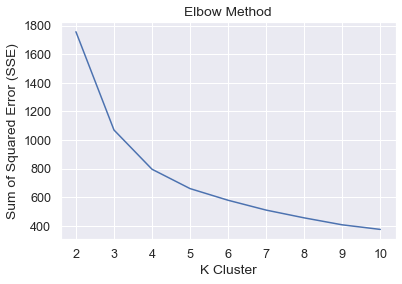

In [62]:
plt.plot(k, sse)
plt.xticks(k)
plt.title('Elbow Method')
plt.xlabel('K Cluster')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

Bisa dilihat pada grafik K = 3 adalah yang paling optimal karena perubahan nilai SSEnya adalah yang terbesar.

### Save Hasil ke Excel